In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from scipy.spatial import distance
from sklearn.datasets import make_classification, load_iris, load_digits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Classification

We have a given dataset 

$$
    (X, y) \in \mathbb{R}^{m \times (n+1)},
$$

where $m$ is the number of samples and $n$ is the number of features.

In the dateset we have the features

$$
    X \in \mathbb{R}^{m \times n}
$$

and the labels 

$$
    y \in \mathbb{N}^m.
$$

We say that 

$$
    (X^{(i)}, y^{(i)}) \in \mathbb{R}^{1 \times (n+1)}
$$

is the $i$-th example ($i = 1, \dots, m$) and 

$$
    X_j \in \mathbb{R}^m
$$ 

is the $j$-th feature vector ($j = 1, \dots, n$), such that 

$$
    X^{(i)}_j \in \mathbb{R}  
$$

is the $j$-th feature of the $i$-th example.

## Binary classification

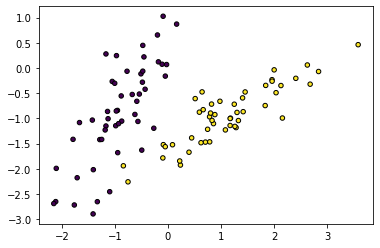

In [2]:
# Make binary example
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, random_state=5)

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")

In [3]:
# Split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((70, 2), (30, 2), (70,), (30,))

In [4]:
# Plot training and test sets
def plot_train_test(X_train, X_test, y_train, y_test):
    """ Plot training and test sets of a 2d classification problem side by side.
    
    Parameter
    ---------
        X_train : ndarray of shape (n_samples, 2)
            Training features.
        X_test : ndarray of shape (n_samples, 2)
            Test features.
        y_train : ndarray of shape (n_samples,)
            Training labels.
        y_test : ndarray of shape (n_samples,)
            Test labels.
    
    Return
    ------
        fig : 
            
        axs :
            
    """
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 3))
    axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolors="k")
    axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolors="k")
    return fig, axs

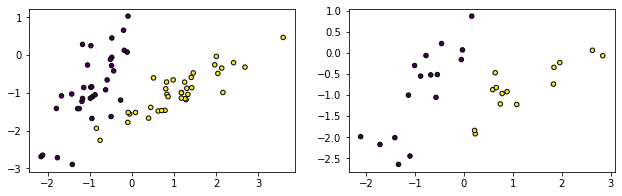

In [5]:
# Plot training and test sets
plot_train_test(X_train, X_test, y_train, y_test)
plt.show()

## Standardization (z-score normalization)

$$
    X' = \frac{X - \mu}{\sigma},
$$

where $\mu$ is the mean of the input data $x$ and $\sigma$ the variance 

In [6]:
# Standardize features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
(X_train.mean(), X_train.std()), (X_test.mean(), X_test.std())

((2.91830052187184e-16, 1.0000000000000002),
 (0.04784848536497145, 1.0384508392306804))

## Logistic regression

### Hypothesis

The hypothesis is given by

$$
\begin{align*}
    h_{w, b}(x) &= g \left( w x + b \right) = \frac{1}{1 + e^{- \left( w^t x + b \right) }}, 
\end{align*}
$$

where $w \in \mathbb{R}^n$ are the weights, $b \in \mathbb{R}$ is the bias (intercept) and 
$g(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid/logistic function.

In [7]:
# Hypothesis (logistic/sigmoid function)
hypo = lambda X, w, b: 1 / (1 + np.exp(- np.sum(w * X, axis=1) + b))

### Cost function (single example)

$$
\begin{equation}
    \text{Cost} \left( h_{w, b}(x), y \right) =
    \begin{cases}
        - \log \left( h_{w, b}(x) \right) & \text{if } y = 1 \\
        - \log \left( 1 - h_{w, b}(x) \right) & \text{if } y = 0
    \end{cases}
\end{equation}
$$

### Simplified cost function (single example)

$$
\begin{equation}
    \text{Cost} \left( h_{w, b}(x), y \right) =
        - y \log \left( h_{w, b}(x) \right)
        - \left( 1 - y \right) \log \left( 1 - h_{w, b}(x) \right)
\end{equation}
$$

### Cost function (overall)

$$
\begin{align*}
    J(w, b) &=  \frac{1}{m} \sum_{i=1}^m \text{Cost} \left( h_{w, b}(x), y \right) \\
            &= - \frac{1}{m} \left( \sum_{i=1}^m y^{(i)} \log \left( h_{w, b}(x^{(i)}) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_{w, b}(x^{(i)}) \right) \right)
\end{align*}
$$

### Gradient descent

#### Goal

$$
    \underset{w \in \mathbb{R}, ~ b \in \mathbb{R}}{\textbf{minimize}} \text{ } J(w,b)
$$

#### Idea 

$$
\begin{align*}
    w &= w - \alpha \cdot \frac{\partial}{\partial w} J(w,b) \\
    b &= b - \alpha \cdot \frac{\partial}{\partial b} J(w,b)
\end{align*}
$$

#### Partial derivatives

$$
\begin{align*}
    \frac{\partial}{\partial w} J(w,b) &= \frac{2}{m} \sum\limits_{i=1}^m x^{(i)} \left( y^{(i)} - h_{w,b}(x^{(i)}) \right) \\
    \frac{\partial}{\partial b} J(w,b) &= \frac{2}{m} \sum\limits_{i=1}^m y^{(i)} - h_{w,b}(x^{(i)})
\end{align*}
$$

&rarr; Same partial derivatives like in Linear Regression


In [8]:
def gradient_descent(X, y, w, b, alpha, num_iters):  
    """Simple gradient descent.
    
    TODO: Add tolerance.
    
    Parameter
    ---------
        X : ndarray of shape (n_samples, n_features)
            Input data.
        y : ndarray of shape (n_samples,)
            Labels.
        w : float
            Weight.
        b : float
            Bias.
    
    Return
    ------
        w : float
            Updated weight.
        b : float
            Updated bias.
    """
    # Number of samples
    m = len(X)
    
    # Total residuals
    total_residuals = []
    
    # Iteratively update the weight and bias
    for i in range(0, num_iters):
        
        # Compute predictions (for all samples)
        predictions = hypo(X, w, b)
        
        # Compute residuals (for all samples)
        residuals = predictions - y
        
        # Compute partial derivitaves 
        w_gradient = np.mean(residuals.reshape(-1, 1) * X, axis=0)
        b_gradient = np.mean(residuals)

        # Update weigths and bias
        w = w - alpha * w_gradient
        b = b - alpha * b_gradient
        
    return w, b

In [9]:
def logistic_regression(X, y, alpha, num_iters):
    """Binary logistic regression using gradient descent.
    
    Parameter
    ---------
        X : ndarray of shpae (n_samples, 1)
            Features.
        y : ndarray of shape (n_samples,)
            Labels.        
        alpha : float
            Stepsize.
        num_iter : int
            Number of iterations.
    
    Return
    ------
        w : float
            Weights.
        b : float
            Bias.
    """
    w = np.zeros(X.shape[1])
    b = 0.0
    w, b = gradient_descent(X, y, w, b, alpha, num_iters)
    return w, b

In [10]:
# Apply logistic regression
w, b = logistic_regression(X_train, y_train, 0.0001, 10000)
w, b

(array([ 0.35688322, -0.04443123]), 0.01629151343179336)

In [11]:
def plot_train_test_dec_bound(X_train, X_test, y_train, y_test, w, b,
                              bound_color='r'):
    """Plot training and test sets and decision boundaries.
    
    Parameter
    ---------
        X_train : ndarray of shape (n_samples, 2)
            Training features.
        X_test : ndarray of shape (n_samples, 2)
            Test features.
        y_train : ndarray of shape (n_samples,)
            Training labels.
        y_test : ndarray of shape (n_samples,)
            Test labels.
        w : float
            Weights.
        b : float
            Bias.
        bound_color : string, default='r'
            Color of the decision boundary.
    """
    fig, axs = plot_train_test(X_train, X_test, y_train, y_test)
    for i, iX in enumerate([X_train, X_test]):
        xx = np.array([iX[:, 0].min(), iX[:, 0].max()])
        axs[i].plot(xx, - w[0] / w[1] * xx - b / w[1], c=bound_color)

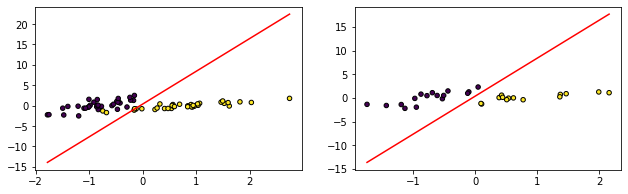

In [12]:
# Plot training and test sets and decision boundaries
plot_train_test_dec_bound(X_train, X_test, y_train, y_test, w, b)

## Multiclass classification

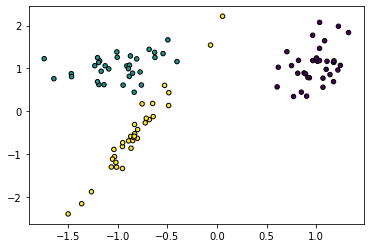

In [13]:
# Make multiclass example
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                           n_classes=3, n_clusters_per_class=1, random_state=1)

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")
plt.show()

In [14]:
# Split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((70, 2), (30, 2), (70,), (30,))

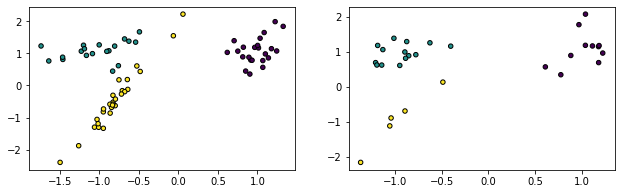

In [15]:
# Plot training and test sets
plot_train_test(X_train, X_test, y_train, y_test)
plt.show()

In [16]:
# Standardize features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
(X_train.mean(), X_train.std()), (X_test.mean(), X_test.std())

((6.3441315692866086e-18, 1.0), (0.1438164749656763, 0.9625616397008404))

### One vs. all

$$
    \underset{i}{\max} h_{w, b}^{(i)} (x)
$$

In [17]:
def logistic_regression_multiclass(X, y, alpha, num_iters):
    """Multiclass logistic regression using gradient descent.
    
    Parameter
    ---------
        X : ndarray of shpae (n_samples, n_features)
            Features.
        y : ndarray of shape (n_samples,)
            Labels.        
        alpha : float
            Stepsize.
        num_iter : int
            Number of iterations.
    
    Return
    ------
        w_all: dict
            Weights for all classes.
        b_all : dict
            Updated for all classes.
    """
    # Run gradient descent for all classes
    classes = np.unique(y_train)
    w_all, b_all = {}, {}
    for c in classes:

        # Convert the current class to 1 and all other classes to 0
        yy_train = (y_train == c).astype(int)

        # Initialize weights and bias
        w = np.zeros(X_train.shape[1])
        b = 0.0

        # Run gradient descent
        w, b = gradient_descent(X_train, yy_train, w, b, alpha, num_iters) 
        w_all[c] = w
        b_all[c] = b

    # Return weights and biases
    return w_all, b_all

In [18]:
# Apply logistic regression
w_all, b_all = logistic_regression_multiclass(X, y, 0.0001, 100)
w_all, b_all

({0: array([0.0044426 , 0.00202487]),
  1: array([-0.00220917,  0.00169654]),
  2: array([-0.00223343, -0.00372141])},
 {0: -0.001716408865040503,
  1: -0.0022885451662545816,
  2: -0.0010012385045010945})

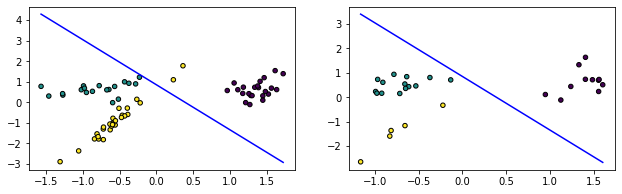

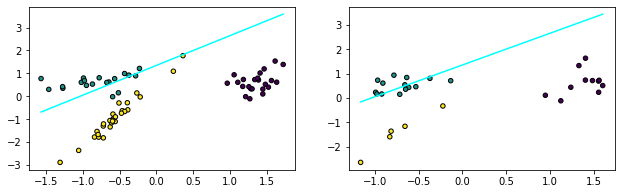

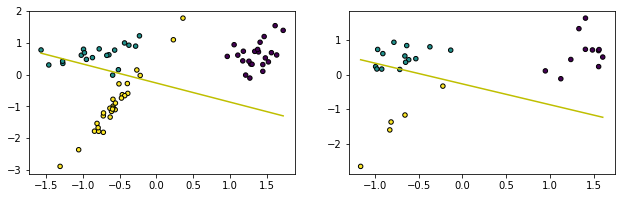

In [19]:
# Plot training and test sets and decision boundaries for all classes
colors = ['b', 'cyan', 'y']
for c in list(w_all.keys()):
    w, b = (w_all[c], b_all[c])
    plot_train_test_dec_bound(X_train, X_test, y_train, y_test, w, b,
                              bound_color=colors[c])

In [20]:
# Choose hypothesis